import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import sqlite3
dat = sqlite3.connect('ds22_guvi_task5_elan.db')

In [ ]:
"""Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user adoption .

As per my understanding there are different way to find the consecutive login attempt on user for visit.
Problem statement vs solution:
1)	Find the  user id from the “takehome_user_engagement” against the visit and timestamp
2)	Convert time_stamp in to date column.so that, it will give the year , Month and Week split.
a.	Year 
b.	Month 
c.	Week
Group these column along with user id and visit.
There are again 2 things can be done 
1)	Each Week how many hits (this approach has been taken)
2)	Or find the min or max of the visit and find the every 7 days visit count and store in Dataframe
3)	Find the count against the user id , Org_id when visit per week is more then or equals to Three(3).
4)	Find the count against the user id when visit per week is more then or equals to Three(3).
5)	Find the count against the Org_id when visit per week is more then or equals to Three(3).
6)	Find the source of the signup count from above with Join

Data Clean/load steps.
1)	Create DF1 with Csv1(takehome_users)
2)	Create DF2 with Csv1(takehome_user_engagement)
3)	Join these two table using object_id , user_id and convert date column as per dataframe date columns
4)	Group by those column and find the count / size .
5)	Draw the chart

1)	Find which User who login most 
2)	Or find the Org who has active visit and it includes more users 
3)	Find the source of the signup 
"""

In [14]:
df1 = pd.read_csv("takehome_users.csv" ,encoding='ISO-8859-1')
df1.rename(columns = {'object_id':'user_id'}, inplace = True)

#df1.to_sql(name='T1', con=dat)

df2 = pd.read_csv("takehome_user_engagement.csv" ,encoding='ascii' , parse_dates =['time_stamp'])

#df2.to_sql(name='T2', con=dat)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [15]:
#pre =pd.merge(df1,df2,on='inner')
check_val = pd.merge(df1, df2, on='user_id')

# check_val = pd.merge(df1, df2, left_on='object_id' , right_on='user_id')
# left_on , right_on 
# 

In [16]:
check_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  object        
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  datetime64[ns]
 11  visited                     207917 non-

In [24]:
#check_val.to_sql(name='T3', con=dat)

207917

In [27]:
"""
a = []
c = dat.cursor()
c.execute("select count(1) from T1 ") 
for i in c.fetchall():
   a.append(str(i))
c = dat.cursor()
c.execute("CREATE TABLE T4(time_stamp date,user_id integer,visited integer) ")
#c = dat.cursor()
c.execute("insert into T4 select cast(time_stamp as date) time_stamp, user_id , visited from T2")
#c.execute("DROP TABLE T4") 

query = dat.execute("SELECT * From T4")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
results
"""

#query = dat.execute(ex1)
#cols = [column[0] for column in query.description]
#results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

'''
t = '2018-09-19'
t = np.datetime64(t)
day = t.astype(datetime.datetime).is
print (day)
'''


In [17]:
# check_val['dt'] = np.datetime64(check_val ['time_stamp'])
check_val['date'] = check_val['time_stamp'].astype('datetime64')
# check_val['wk'] = check_val['date'].dt.week
check_val['wk'] = check_val['date'].dt.isocalendar().week
check_val['yr'] = check_val['date'].dt.isocalendar().year
check_val['mn'] = check_val['date'].dt.month

In [22]:
#check_val.info()
#check_val.count()
#check_val.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  object        
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  object        
 11  visited                     207917 non-

In [44]:
#c=check_val.groupby(by=['user_id','yr' , 'wk' , 'visited'], as_index=False).count()
# a = check_val.groupby('user_id','yr' , 'wk','visited' )['visited'].count()

In [40]:
count_series = check_val.groupby(['user_id','org_id','yr' ,'mn', 'wk' , 'visited']).size()

In [41]:
new_df = count_series.to_frame(name = 'size').reset_index()
new_df

,user_id,org_id,yr,mn,wk,visited,size
0,1,11,2014,4,17,1,1
1,2,1,2013,11,46,1,1
2,2,1,2013,11,48,1,1
3,2,1,2013,12,50,1,1
4,2,1,2013,12,52,1,1
...,...,...,...,...,...,...,...
75928,11996,89,2013,9,36,1,1
75929,11997,200,2013,1,3,1,1
75930,11998,83,2014,4,17,1,1
75931,11999,6,2012,6,22,1,1


In [42]:
new_df_1 = new_df[new_df['size'] >= 3]

In [45]:
new_df_1.info()
new_df_1.rename(columns = {'size':'cnt'}, inplace = True)
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32754 entries, 6 to 75916
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  32754 non-null  int64 
 1   org_id   32754 non-null  int64 
 2   yr       32754 non-null  UInt32
 3   mn       32754 non-null  int64 
 4   wk       32754 non-null  UInt32
 5   visited  32754 non-null  int64 
 6   cnt      32754 non-null  int64 
dtypes: UInt32(2), int64(5)
memory usage: 1.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32754 entries, 6 to 75916
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  32754 non-null  int64 
 1   org_id   32754 non-null  int64 
 2   yr       32754 non-null  UInt32
 3   mn       32754 non-null  int64 
 4   wk       32754 non-null  UInt32
 5   visited  32754 non-null  int64 
 6   cnt      32754 non-null  int64 
dtypes: UInt32(2), int64(5)
memory usage: 1.8 MB


In [8]:
# new_df_1[ (new_df_1['user_id'] == 1027) & (new_df_1['wk'] == 1) & (new_df_1['yr'] == 2013) ]
# check_val[ (check_val['user_id'] == 1027) & (check_val['wk'] == 1) & (check_val['yr'] == 2013) ]

In [29]:
df2.info()
#df2['wk'] = df2['time_stamp'].dt.isocalendar().week
#df2['yr'] = df2['time_stamp'].dt.isocalendar().year
#df2['mn'] = df2['time_stamp'].dt.month
#df2
# df2[ (df2['user_id'] == 1027) & (df2['wk'] <= 1) & (df2['yr'] == 2013) ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [48]:
#print(new_df_1['user_id'].unique())
# new_df_2 = new_df_1.sort_values(by=['user_id', 'org_id' ], inplace=True)
new_df_2 = new_df_1
new_df_2 = new_df_2.groupby(['user_id','org_id']).size()
new_df_2 = new_df_2.to_frame(name = 'size').reset_index()
new_df_2.rename(columns = {'size':'cnt'}, inplace = True)
new_df_2

,user_id,org_id,cnt
0,2,1,1
1,10,318,51
2,20,58,1
3,33,401,1
4,42,235,66
...,...,...,...
1411,11965,65,1
1412,11967,15,7
1413,11969,52,21
1414,11975,31,43


In [49]:
#df2['wk_1'] = df2['time_stamp'].dt.week
#df2[ (df2['user_id'] == 1027) & (df2['wk_1'] <= 1) & (df2['yr'] == 2013) ]

In [3]:
#elan = check_val.groupby(['org_id', 'visited']).size()
#elan

#elan = check_val.groupby(['creation_source', 'visited']).size()
#elan


<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

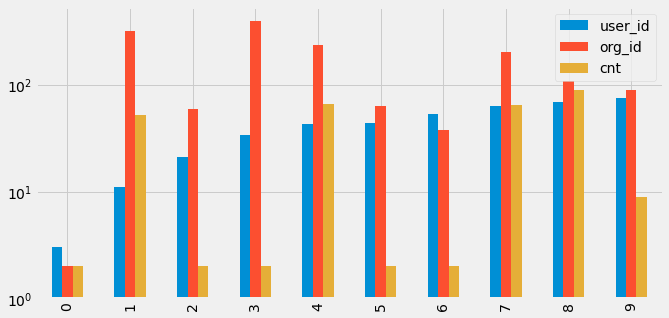

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
new_df_2.head(10).plot.bar(figsize=(10,5)  , log=True)


In [52]:
user_vs_org_id = new_df_2[["user_id","org_id"]]
user_vs_cnt = new_df_2[["user_id","cnt"]]
org_vs_cnt = new_df_2[["org_id","cnt"]]

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

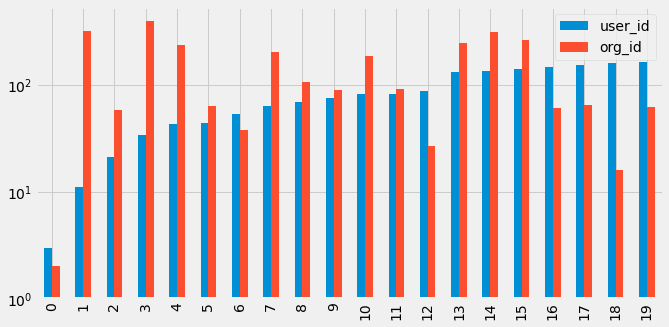

In [53]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
user_vs_org_id.head(20).plot.bar(figsize=(10,5)  , log=True)

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

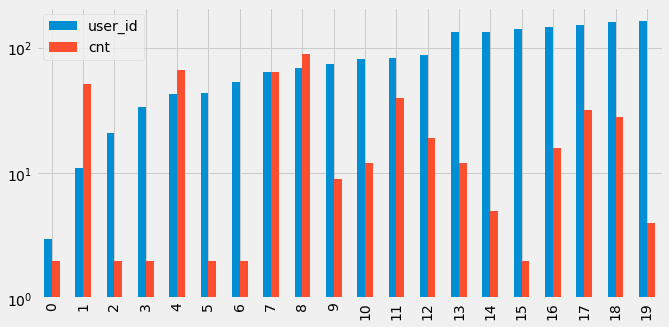

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
user_vs_cnt.head(20).plot.bar(figsize=(10,5)  , log=True)

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

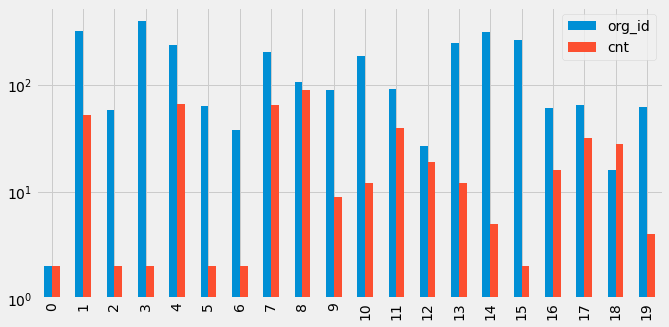

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
org_vs_cnt.head(20).plot.bar(figsize=(10,5)  , log=True)

In [59]:
creation_source_org_id = check_val[["user_id","org_id","creation_source"]]
creation_source_org_id.info()
#new_df_2
creation_source_vs_user_org_id = pd.merge(creation_source_org_id, new_df_2, on='user_id')
#creation_source_vs_user_org_id.info()
#creation_source_vs_user_org_id.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          207917 non-null  int64 
 1   org_id           207917 non-null  int64 
 2   creation_source  207917 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 196066 entries, 0 to 196065
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          196066 non-null  int64 
 1   org_id_x         196066 non-null  int64 
 2   creation_source  196066 non-null  object
 3   org_id_y         196066 non-null  int64 
 4   cnt              196066 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 9.0+ MB


In [71]:
cr_src_vs_user_org_id = creation_source_vs_user_org_id[["user_id","org_id_x","creation_source"]]

cr_src_vs_user_org_id_grp = cr_src_vs_user_org_id.groupby(['creation_source']).size()
cr_src_vs_user_org_id_grp = cr_src_vs_user_org_id_grp.to_frame(name = 'size').reset_index()
cr_src_vs_user_org_id_grp.rename(columns = {'size':'cnt'}, inplace = True)

#cr_src_vs_user_org_id_rm_dup = cr_src_vs_user_org_id[cr_src_vs_user_org_id.duplicated(keep='first')]
#cr_src_vs_user_org_id_rm_dup = cr_src_vs_user_org_id_rm_dup.drop_duplicates()
#cr_src_vs_user_org_id_rm_dup.info()
cr_src_vs_user_org_id_grp.info()
cr_src_vs_user_org_id_grp


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   creation_source  5 non-null      object
 1   cnt              5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


,creation_source,cnt
0,GUEST_INVITE,44513
1,ORG_INVITE,65654
2,PERSONAL_PROJECTS,18126
3,SIGNUP,35272
4,SIGNUP_GOOGLE_AUTH,32501


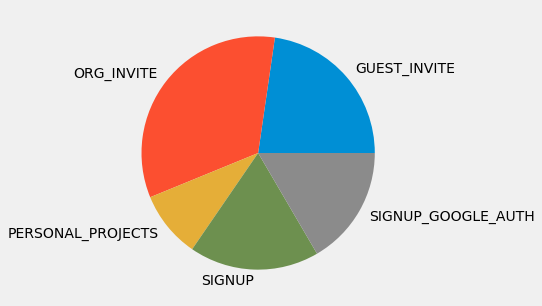

In [81]:
y = np.array(cr_src_vs_user_org_id_grp['cnt'])
mylabels = np.array(cr_src_vs_user_org_id_grp['creation_source'])
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
# cr_src_vs_user_org_id_grp.head(20).plot.pie(figsize=(10,5)  , log=True)
plt.pie(y,labels =mylabels)
plt.show()